In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print('x_train : ',x_train.shape)

x_train :  (50000, 32, 32, 3)


In [4]:
print('x_test : ',x_test.shape)

x_test :  (10000, 32, 32, 3)


In [5]:
K = len(np.unique(y_train))    # classes
print('Number of classes :', K)

Number of classes : 10


In [6]:
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = x_train.shape[1]*x_train.shape[1]*3

print('Number of train samples :', Ntr)
print('Number of test samples :', Nte)
print('Dimension of each sample :', Din)

Number of train samples : 50000
Number of test samples : 10000
Dimension of each sample : 3072


In [7]:
labels = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog',
         7:'horse', 8:'ship', 9:'truck'}

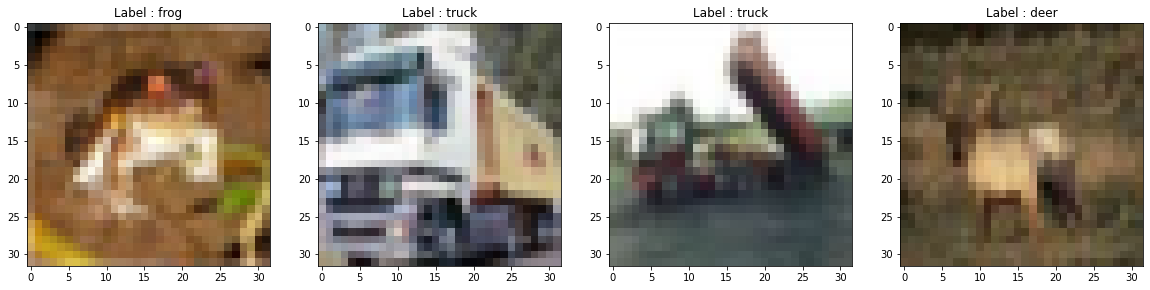

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(20,20))

for i in range(0, 4):
    img = x_train[i]
    ax.ravel()[i].imshow(img)
    ax.ravel()[i].set_title("Label : {}".format(labels.get(y_train[i][0])))

In [9]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

mean_image = np.mean(x_train, axis=0)

x_train = x_train - mean_image
x_test = x_test - mean_image

In [10]:
# like one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

In [11]:
y_train.shape

(50000, 10)

In [12]:
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
x_train.shape

(50000, 3072)

In [14]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

w1: (3072, 10)
b1: (10,)
